# Random numbers and probability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## What are chances?

#### Probability of an event

The probability of an event is the **number of ways the event can happen divided by the total number of possible outcomes**. For example, the probability of getting a tail when flipping a coin is 1/2, because there's 1 way to get tails with two possible outcomes. 

#### Sampling 

Sampling means to **choose one or more values from a set, randomly**.  

* **Sampling without replacement** means that once a **value** is selected, this **will be out of our set the next time** we do the experiment. 

* **Sampling with replacement** means that it doesn't matter if a **value has already been selected**, it **can be chosen again** if the experiment is repeated.

#### Event independence

**Two events are independent if the probability of the second event isn't affected by the outcome of the first one**. The results of sampling with replacement are independent events.

On the other hand, two events are dependent if the probability of the second event is affected by the outcome of the first one. The results of sampling without replacement are dependent events. 

### Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. 

In [3]:
amir_deals = pd.read_csv('/home/alidhasem/data_science_notes/introduction_to_statistics_in_python/data/amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [4]:
# Count the number of deals Amir worked on for each product type and store in counts
counts = amir_deals['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [5]:
# Calculate the probability of selecting a deal for the different product types
# Save this as probs
probs = counts / amir_deals.shape[0] 
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

### Sampling deals

In [6]:
# Set the random seed to 24
# Take a sample of 5 deals without replacement and store them as sample_without_replacement

np.random.seed(24)
sample_without_replacement = amir_deals.sample(5)
sample_without_replacement

,product,client,status,amount,num_users
128,Product B,Current,Won,2070.25,7
149,Product D,Current,Won,3485.48,52
78,Product B,Current,Won,6252.30,27
105,Product D,Current,Won,4110.98,39
167,Product C,New,Lost,3779.86,11


In [7]:
# Take a sample of 5 deals with replacement and save as sample_with_replacement
np.random.seed(24)
sample_with_replacement = amir_deals.sample(5, replace=True)
sample_with_replacement

,product,client,status,amount,num_users
163,Product D,Current,Won,6755.66,59
132,Product B,Current,Won,6872.29,25
88,Product C,Current,Won,3579.63,3
146,Product A,Current,Won,4682.94,63
146,Product A,Current,Won,4682.94,63


## Discrete distributions

#### Probability distribution

A probability distribution **describes the probability of each outcome** in an experiment.

#### Discrete probability distributions

The **probability distributions** of experiments with **discrete outcomes** are called discrete probability distributions.

* If all the outcomes have the **same probability**, the distribution is called a **discrete uniform distribution**. 

#### Expected value

The expected value of a probability distribution is a name given to the **the mean of the distribution**. It's calculated by **summing the possible outcome values of the scenario multiplied by it's probability**.

#### Calculating probabilities from distributions

We can **calculate probabilities** of different outcomes by **taking areas of the probability distribution**.

#### Law of large numbers

We can take **random samples from values from a discrete distribution**. This is, run the experiment a specified number of times and save the results.

The law of large number says that **as the size of the sample increases, the smaple mean tends to the expected value** of the theoretical distribution. 

### Creating a probability distribution

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first.

In [8]:
restaurant_groups = pd.DataFrame({
    'group_id' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'group_size' : [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
})

<AxesSubplot:>

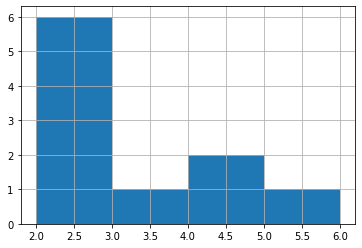

In [9]:
# Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])

In [10]:
# Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size 
# Save as size_dist
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset the index of size_dist
size_dist = size_dist.reset_index()

# Rename the columns of size_dist to group_size and prob
size_dist.columns = ['group_size', 'prob']

size_dist

,group_size,prob
0,2,0.6
1,4,0.2
2,6,0.1
3,3,0.1


In [11]:
# Calculate the expected value of the size_distribution, which represents the expected group size
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
expected_value

2.9000000000000004

In [12]:
# Calculate the probability of randomly picking a group of 4 or more people
size_dist[size_dist['group_size'] >= 4]['prob'].sum()

0.30000000000000004

## Continuous distributuions

#### Continuous distribution

Is the **probability distribution** of the outcomes of an experiment, when the **outcome variable is continuous**.

If all the possible **outcome values** have the **same probability** of occurrence, then the distribution is called a **continuous uniform distribution**.

#### Getting probabilities from continuous distributions

Similarly to the case for discrete distributions, you can calculate the **probability of an event** calculating the **area under the distribution curve** related with that event.

There are many shapes a continuous **probability distribution** can take, but the **area beneath its graph must always equal to 1**.

### Data back-ups


The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up.

In [13]:
# To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time
min_time = 0
max_time = 30

In [14]:
# Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes
# Store in a variable called prob_less_than_5

from scipy.stats import uniform

prob_less_than_5 = uniform.cdf(5, min_time, max_time)
prob_less_than_5

0.16666666666666666

In [15]:
# Calculate the probability that Amir has to wait more than 5 minutes 
# Store in a variable called prob_greater_than_5
prob_greater_than_5 = 1 - prob_less_than_5 
prob_greater_than_5

0.8333333333333334

In [16]:
# Calculate the probability that Amir has to wait between 10 and 20 minutes 
# Store in a variable called prob_between_10_and_20
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
prob_between_10_and_20

0.3333333333333333

### Simulating wait times


To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect.

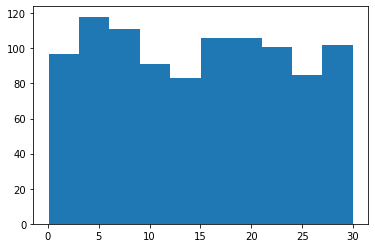

In [17]:
# Set the random seed to 334
np.random.seed(334)

# Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time 
# Save this as wait_times
wait_times = uniform.rvs(min_time, max_time, size=1000)

# Create a histogram of the simulated wait times and show the plot
plt.hist(wait_times)
plt.show()

## The binomial distribution

#### Binomial outcomes

An experiment has a binomial outcome if it has **two possible results**. We can represent these outcomes as: 

* 1 and 0.
* Success and failure. 
* Win or loss.  

#### Binomial distribution

It is the **probability distribution** of the **number of successes** in a sequence of **independent trials** of a binomial experiment. It is a discrete distribution and can be describe using the following two parameters:

* $n$: total number of trials.
* $p$: probability of success.

The **expected value** of the binomial distribution is **$x = np$**.

### Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. 

In [19]:
# Import binom from scipy.stats and set the random seed to 10
from scipy.stats import binom
np.random.seed(10)

In [25]:
# Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on
np.random.seed(10)
binom.rvs(1, 0.3, size=1)

array([1])

In [24]:
# Simulate a typical week of Amir's deals, or one week of 3 deals
np.random.seed(10)
binom.rvs(3, 0.3, size=1)

array([1])

In [29]:
# Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals
np.random.seed(10)
deals = binom.rvs(3, 0.3, size=52)

# Print the mean number of deals he won per week
np.mean(deals)

0.8269230769230769

### Calculating binomial probabilities

Amir wants to get an idea of how likely he is to close a certain number of deals each week.

In [30]:
# What's the probability that Amir closes all 3 deals in a week? 
# Save this as prob_3
prob_3 = binom.pmf(3, 3, 0.3)
prob_3

0.026999999999999996

In [31]:
# What's the probability that Amir closes 1 or fewer deals in a week? 
# Save this as prob_less_than_or_equal_1
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
prob_less_than_or_equal_1

0.784

In [32]:
# What's the probability that Amir closes more than 1 deal?
# Save this as prob_greater_than_1
prob_greater_than_1 = 1 - prob_less_than_or_equal_1
prob_greater_than_1 

0.21599999999999997

### How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes.

In [34]:
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate
won_30pct = 3 * 0.3
won_30pct

0.8999999999999999

In [35]:
# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%
won_25pct = 3 * 0.25
won_25pct

0.75

In [36]:
# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%
won_35pct = 3 * 0.35
won_35pct

1.0499999999999998